# Haberman's Survival Data Set - Assignment1

Objectives:

<font color='brown'>The dataset contains cases from a study that was conducted between 1958 and 1970 at the University         of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
    we need to analyze the data and predict patient's survival status.
    Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
    </font>

Source:
https://www.kaggle.com/gilsousa/habermans-survival-data-set

# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Importing Data

In [3]:
#Load haberman.csv into a pandas dataFrame.
haberman = pd.read_csv("haberman.csv")

# Check Number of Data Available:

In [4]:
haberman.shape

(305, 4)

Observations:

<font color='brown'>It has 305 rows and 4 atributes</font>

# Check top five data for Priliminary Analysis

In [5]:
haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [25]:
# I can see there is no header available, so getting header from kaggle and update dataframe with proper header

haberman.columns = ['Age', 'Operation_Year', 'axil_nodes', 'Surv_status']
haberman.head()

,Age,Operation_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [7]:
haberman["Surv_status"].value_counts()

1    224
2     81
Name: Surv_status, dtype: int64

Observations:

<font color='brown'>
1. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
    <br>
2. 224 patients survived 5 years or longer
    <br>
3. 81 patients died within 5 year
    <br>
4. Given dataset has data imbalanced 
</font>

In [8]:
haberman.describe()

,Age,Operation_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


Observations:   
    <font color='brown'>
    Count is same for all and we have 305 rows so, no missing data
    </font>

# Pair-plot

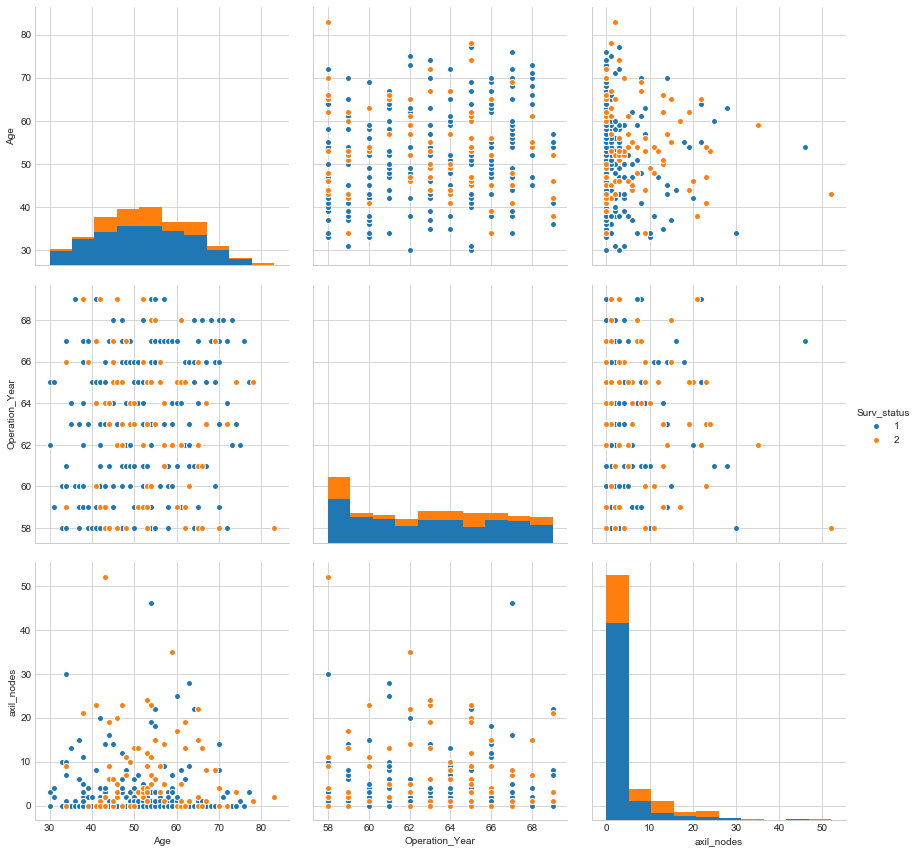

In [32]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Surv_status", vars=["Age", "Operation_Year", "axil_nodes"], size=4, diag_kind="hist");
plt.show()

Observations:
<font color='brown'>
1. if age < 35, surv_status is 1
               <br>
2. if operation_year = 58 and axil_nodes < 20, surv_status is 2
               <br>
3. as of now, all features are important but we can't clearly segregrate surv_status based on above pairplot 
</font>

# Histogram, PDF, CDF

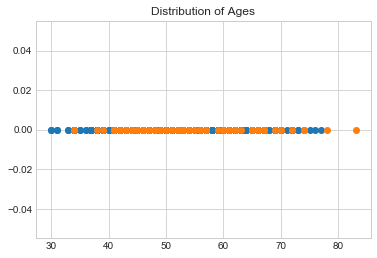

In [35]:

surv_status_1 = haberman.loc[haberman["Surv_status"] == 1];
surv_status_2 = haberman.loc[haberman["Surv_status"] == 2];


plt.plot(surv_status_1["Age"], np.zeros_like(surv_status_1['Age']), 'o')
plt.plot(surv_status_2["Age"], np.zeros_like(surv_status_2['Age']), 'o')
plt.title("Distribution of Ages")
plt.show()

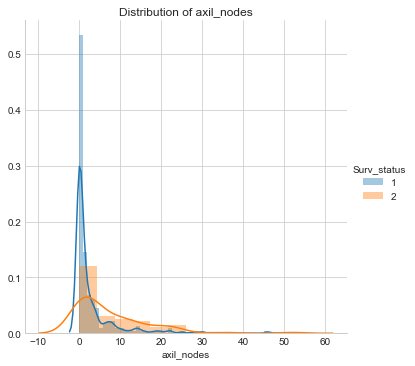

In [39]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title("Distribution of axil_nodes")
plt.show();

Observations:
<font color='brown'>
    there is high pbobability that patients with axil_nodes 0,1 are going to live more than 5 years
 </font>

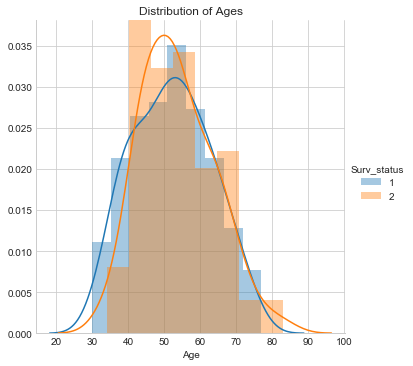

In [41]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Distribution of Ages")
plt.show();

Observations:
<font color='brown'>
1. Difficult to differentiate because overlapping is too much
     <br>
2. Age less than 34 are more likely to survive more than 5 years
</font>

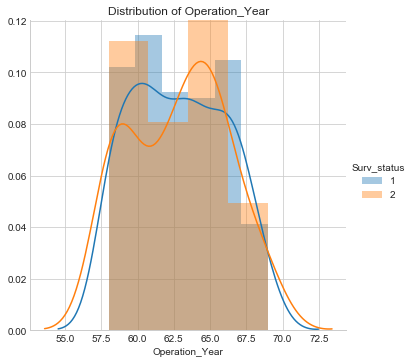

In [42]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Operation_Year") \
   .add_legend();
plt.title("Distribution of Operation_Year")
plt.show();

[0.04910714 0.10714286 0.125      0.09375    0.16517857 0.16517857
 0.09375    0.11160714 0.0625     0.02678571]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


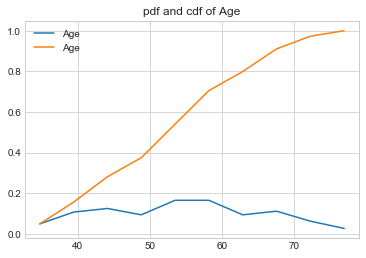

[0.1875     0.10714286 0.10267857 0.07142857 0.09821429 0.09821429
 0.06696429 0.09821429 0.09375    0.07589286]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


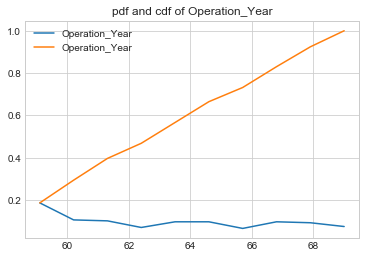

[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


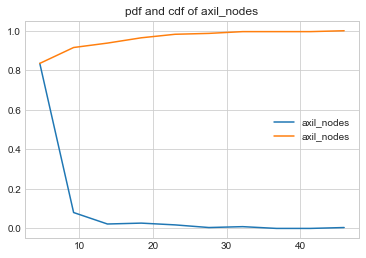

In [44]:
for i in haberman.columns[:-1]:
    counts, bin_edges = np.histogram(surv_status_1[i], bins=10, 
                                 density = True)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf, label=i);
    plt.plot(bin_edges[1:], cdf, label=i)
    plt.legend()
    plt.title("pdf and cdf of " + i)
    plt.show();



Observations:

<font color='brown'>
if axil_nodes <10 then more patients survived 5 years or longer
</font>

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


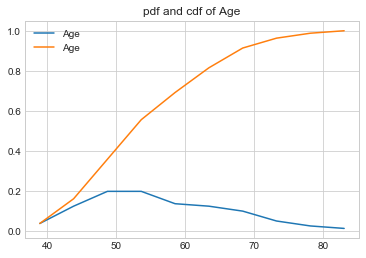

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


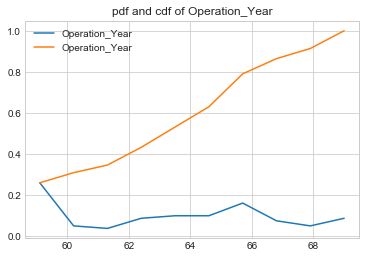

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


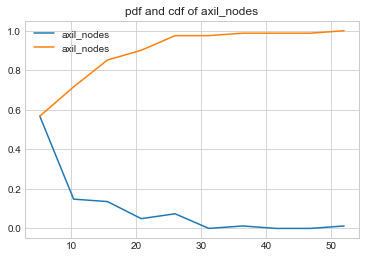

In [45]:
for i in haberman.columns[:-1]:
    counts, bin_edges = np.histogram(surv_status_2[i], bins=10, 
                                 density = True)
    pdf = counts/(sum(counts))
    print(pdf);
    print(bin_edges);
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf, label=i);
    plt.plot(bin_edges[1:], cdf, label=i)
    plt.legend()
    plt.title("pdf and cdf of " + i)
    plt.show();

# Mean, Variance and Std-dev

In [63]:
#Mean, Variance, Std-deviation,  
for i in haberman.columns[:-1]:
    print("Means for %s:" %(i))
    print(np.mean(surv_status_1[i]))
    print(np.mean(surv_status_2[i]))


    print("\nStd-dev for %s:" %(i));
    print(np.std(surv_status_1[i]))
    print(np.std(surv_status_2[i]))
    print("*"*20)




Means for Age:
52.11607142857143
53.67901234567901

Std-dev for Age:
10.913004640364269
10.10418219303131
********************
Means for Operation_Year:
62.857142857142854
62.82716049382716

Std-dev for Operation_Year:
3.2220145175061514
3.3214236255207883
********************
Means for axil_nodes:
2.799107142857143
7.45679012345679

Std-dev for axil_nodes:
5.869092706952767
9.128776076761632
********************


Observations:
<font color='brown'>
1. mean and standard deviation for "Age" and "Operation_Year" for both survival status is quite same
<br>
2. mean number of axil_nodes is around 3 for patients who survived 5 years or longer
<br>
3. mean number of axil_nodes is around 7 for patients who died within 5 year
</font>

 # Median, Percentile, Quantile, IQR, MAD


Objectives:
<font color='brown'>
  sometimes mean values can't be a parameter to check mean of all values because if there is an outlier then it will 
    give wrong value, to overcome this we will go for Median(this gives resonable output until we have 50% outlier in dataset)
    </font>

In [66]:
#Median, Quantiles, Percentiles, IQR.
for i in haberman.columns[:-1]:
    print("\nMedians for %s:" %(i))
    print(np.median(surv_status_1[i]))
    print(np.median(surv_status_2[i]))
    


    print("\nQuantiles for %s:" %(i))
    print(np.percentile(surv_status_1[i],np.arange(0, 100, 25)))
    print(np.percentile(surv_status_2[i],np.arange(0, 100, 25)))
    

    print("\n95th Percentiles for %s:" %(i))
    print(np.percentile(surv_status_1[i],95))
    print(np.percentile(surv_status_2[i],95))
    

    from statsmodels import robust
    print ("\nMedian Absolute Deviation for %s:" %(i))
    print(robust.mad(surv_status_1[i]))
    print(robust.mad(surv_status_2[i]))
 


Medians for Age:
52.0
53.0

Quantiles for Age:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

95th Percentiles for Age:
70.0
70.0

Median Absolute Deviation for Age:
13.343419966550417
11.860817748044816

Medians for Operation_Year:
63.0
63.0

Quantiles for Operation_Year:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

95th Percentiles for Operation_Year:
68.0
68.0

Median Absolute Deviation for Operation_Year:
4.447806655516806
4.447806655516806

Medians for axil_nodes:
0.0
4.0

Quantiles for axil_nodes:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

95th Percentiles for axil_nodes:
14.0
23.0

Median Absolute Deviation for axil_nodes:
0.0
5.930408874022408


# Box plot and Whiskers


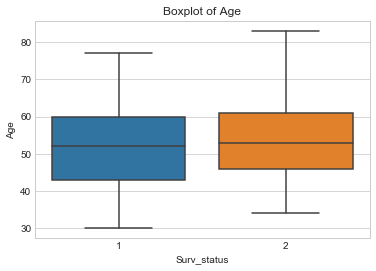

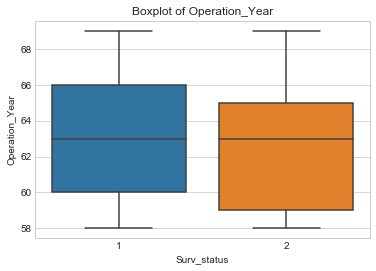

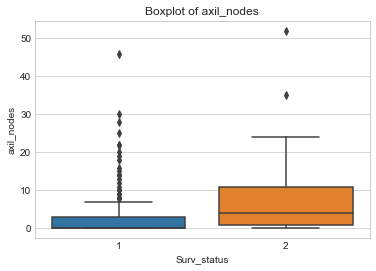

In [46]:
for i in haberman.columns[:-1]:    
    sns.boxplot(x='Surv_status',y=i, data=haberman)
    plt.title("Boxplot of " + i)
    plt.show()

<font color='brown'>Box plot represents our data based on values on sequence of (min, 25%, 50%(mean), 75%, max)</font>

Observations:
<font color='brown'>
  1. Mean age who survived more than 5 years is around 52
</font>  


# Violin plots

Objectives:
<font color='brown'>
    This combines histogram, PDF and boxplot
</font>

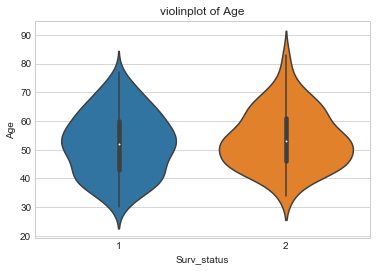

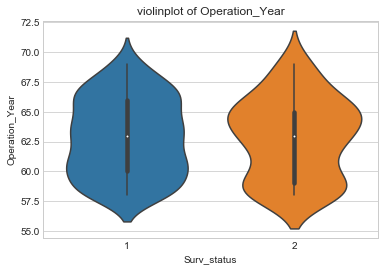

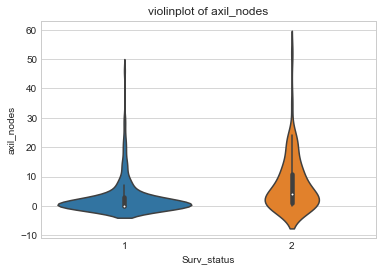

In [47]:
for i in haberman.columns[:-1]:  
    sns.violinplot(x="Surv_status", y=i, data=haberman, size=8)
    plt.title("violinplot of " + i)
    plt.show()

Observations:

<font color='brown'>
    Patients with axil_nodes 0 or 1 are likely to live more than 5 years.
    </font>

# Conclusions:

1. Patients with axil_nodes 0 or 1 are likely to live more than 5 years. 
2. if age < 35, patients are likely to live more than 5 years. 
3. if operation_year = 58 and axil_nodes < 20,  patients are likely to die within 5 years.
4. if axil_nodes <10 then 80% chances that patients survived 5 years or longer 

# END